# Clustering using Iris dataset

### Loading libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Setting the random seed

In [2]:
np.random.seed(30)

### Loading iris dataset

In [3]:
iris = datasets.load_iris()

Splitting our dataset into targets and into data only

In [4]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
z = x
z['Targets'] = pd.Series(iris.target)

### Data exploration

Taking a look at the data

In [5]:
x.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Targets'],
      dtype='object')

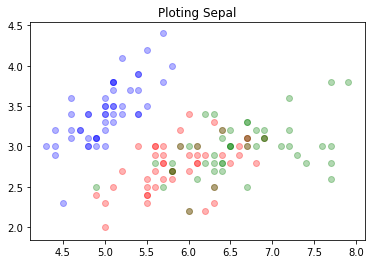

In [6]:
plt.title("Ploting Sepal")
plt.scatter(x.Sepal_Length[:50],x.Sepal_Width[:50],color='b', alpha=0.3)
plt.scatter(x.Sepal_Length[51:100],x.Sepal_Width[51:100],color='r', alpha=0.3)
plt.scatter(x.Sepal_Length[101:150],x.Sepal_Width[101:150],color='g', alpha=0.3)
plt.show()

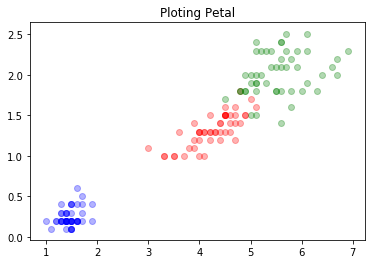

In [7]:
plt.title("Ploting Petal")
plt.scatter(x.Petal_Length[:50],x.Petal_Width[:50],color='b', alpha=0.3)
plt.scatter(x.Petal_Length[51:100],x.Petal_Width[51:100],color='r', alpha=0.3)
plt.scatter(x.Petal_Length[101:150],x.Petal_Width[101:150],color='g', alpha=0.3)
plt.show()

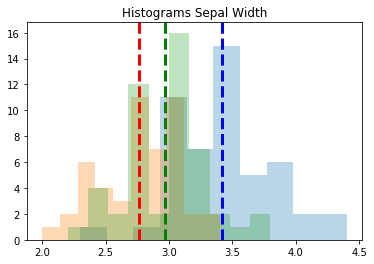

In [8]:
plt.title("Histograms Sepal Width")
plt.hist(z.Sepal_Width[:50], bins=10, alpha=0.3)
plt.axvline(x.Sepal_Width[:50].mean(), color='b', linestyle='dashed', linewidth=3)
plt.hist(z.Sepal_Width[51:100], bins=10, alpha=0.3)
plt.axvline(x.Sepal_Width[51:100].mean(), color='r', linestyle='dashed', linewidth=3)
plt.hist(z.Sepal_Width[101:150], bins=10, alpha=0.3)
plt.axvline(x.Sepal_Width[101:150].mean(), color='g', linestyle='dashed', linewidth=3)
plt.show()

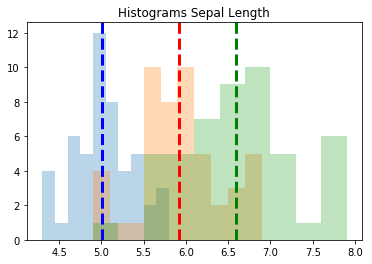

In [9]:
plt.title("Histograms Sepal Length")
plt.hist(z.Sepal_Length[:50], bins=10, alpha=0.3)
plt.axvline(x.Sepal_Length[:50].mean(), color='b', linestyle='dashed', linewidth=3)
plt.hist(z.Sepal_Length[51:100], bins=10, alpha=0.3)
plt.axvline(x.Sepal_Length[51:100].mean(), color='r', linestyle='dashed', linewidth=3)
plt.hist(z.Sepal_Length[101:150], bins=10, alpha=0.3)
plt.axvline(x.Sepal_Length[101:150].mean(), color='g', linestyle='dashed', linewidth=3)
plt.show()

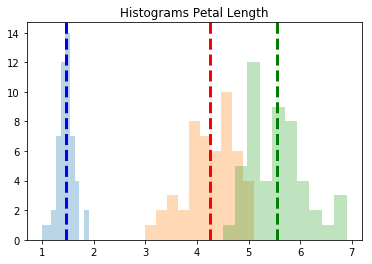

In [10]:
plt.title("Histograms Petal Length")
plt.hist(z.Petal_Length[:50], bins=10, alpha=0.3)
plt.axvline(x.Petal_Length[:50].mean(), color='b', linestyle='dashed', linewidth=3)
plt.hist(z.Petal_Length[51:100], bins=10, alpha=0.3)
plt.axvline(x.Petal_Length[51:100].mean(), color='r', linestyle='dashed', linewidth=3)
plt.hist(z.Petal_Length[101:150], bins=10, alpha=0.3)
plt.axvline(x.Petal_Length[101:150].mean(), color='g', linestyle='dashed', linewidth=3)
plt.show()

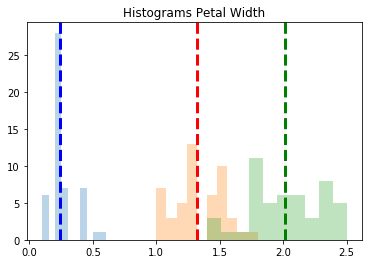

In [11]:
plt.title("Histograms Petal Width")
plt.hist(z.Petal_Width[:50], bins=10, alpha=0.3)
plt.axvline(x.Petal_Width[:50].mean(), color='b', linestyle='dashed', linewidth=3)
plt.hist(z.Petal_Width[51:100], bins=10, alpha=0.3)
plt.axvline(x.Petal_Width[51:100].mean(), color='r', linestyle='dashed', linewidth=3)
plt.hist(z.Petal_Width[101:150], bins=10, alpha=0.3)
plt.axvline(x.Petal_Width[101:150].mean(), color='g', linestyle='dashed', linewidth=3)
plt.show()

From the dataset visualization we can easily see that there's a group that can be easily distinguished which is the blue one in the previous visualization. 

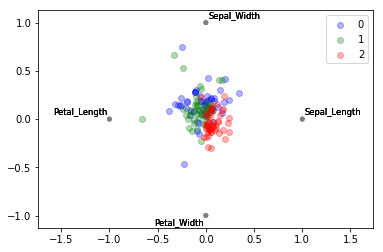

In [12]:
from pandas.plotting import radviz
radviz(z[:50], 'Targets', alpha=0.3,color='b')
radviz(z[50:100], 'Targets', alpha=0.3,color='g')
radviz(z[101:150], 'Targets', alpha=0.3,color='r')
plt.show()

### Number of clusters

We know for sure that there are only three clusters so it would be better to have those but let's try using the elbow method to do it

In [13]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()


def select_clusters(dataset, init_cluster='k-means++', tolerance=0.0001,loops=10,max_iterations=10,
                    jobs=16):

    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Object KMeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance, n_jobs=jobs)

        # Calculate Kmeans
        kmeans.fit(dataset)

        # Obtain inertia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)

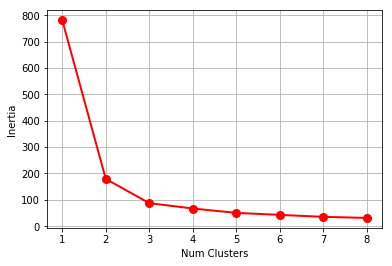

In [14]:
select_clusters(dataset = x,loops = 8)

From this method we can see that we could use three or two clusters. Let's plot and try both options

In [15]:
model = KMeans(n_clusters=3,random_state=30)
model.fit(x)
x_predict = model.fit_predict(x)
x_transform = model.fit_transform(x)

In [16]:
print(metrics.accuracy_score(y, x_predict))
print(metrics.confusion_matrix(y, x_predict))

0.9933333333333333
[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]


Text(0.5,1,'K Mean Classification')

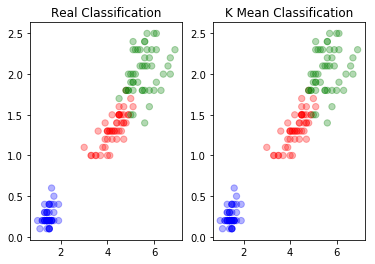

In [17]:
# Create a colormap
colormap = np.array(['b', 'r', 'g'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40,alpha=0.3)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40,alpha=0.3)
plt.title('K Mean Classification')

A simple Kmeans works really well for this dataset.This dataset is well defined and the means of each cluster for each attribute is far from each other